# 구간별 차로변경횟수: 남양주TG, 서울방향
* cell별 지나간 차량대수

# Imports

In [74]:
import numpy as np
import pandas as pd
import math
import os

from tqdm import tqdm

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Dataset

In [75]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/27_남양주영업소_드론영상분석/서울방향/01_density_by_target_LOS_concated_lanechange'

In [76]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/35_22-9차 회의 준비/11_남양주TG_구간별 차로변경횟수 및 교통량/구간별 차로변경횟수/서울방향'

In [77]:
file_list = os.listdir(data_dir)
file_list = file_list[:6]
print(file_list)

['01_1_A.csv', '01_2_A.csv', '01_3_A.csv', '02_1_A.csv', '02_2_A.csv', '02_3_A.csv']


# Color Palette
`px.colors.sequential.Viridis`

In [78]:
palette_ryb = ['#00b0f0', '#ffff00', '#ff5050'] # 엇갈림구간 프로젝트의 그 삼색팔레트 : 파랑-노랑-빨강

In [79]:
palette_redwhite = ['#ffffff', '#ff0000']

In [80]:
palette_bluewhite = ['#ffffff', '#0054ff']

In [81]:
palette_whitered = ['#ff0000', '#ffffff']

In [82]:
palette_whiteblue = ['#0054ff', '#ffffff']

In [83]:
def cell_num(x):
    """x 좌표를 바탕으로 소속 셀 영역 알려줌"""
    
    cell = x//20
    
    return cell

# Draw it

## 차로변경 횟수

01_1_A.csv 11
01_2_A.csv 11
01_3_A.csv 11
02_1_A.csv 12
02_2_A.csv 12
02_3_A.csv 12


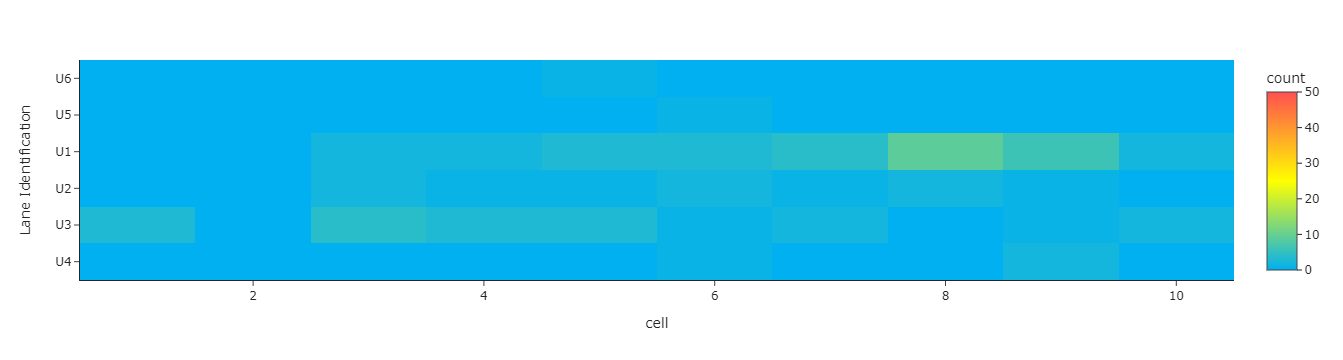

In [84]:
for file in file_list:
    
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    df = pd.read_csv(file_path)
    
    df['cell'] = df['Local X (m)'].apply(cell_num)
    cell_bin = int(df['cell'].max())
    
    print(file, cell_bin)
    
    df = df[(df['Lane Identification'] != 'UNKNOWN') & (df['Lane_change'] == 'Change')]

    
    fig = px.density_heatmap(df,
                             x = 'cell', y = 'Lane Identification', z = 'Lane_change', histfunc = 'count',
                             color_continuous_scale = palette_ryb,
                             range_color = [0, 50],
                             nbinsx = cell_bin,
                             category_orders = {'Lane Identification':['U1', 'U2', 'U3', 'U4', 'UNKNOWN']}, 
                             template = 'simple_white',
                             width = 1500,
                             text_auto = True)

    save_html_name = f'lanechange_count_{file[-10:-6]}.html'
    save_html_path = os.path.join(save_dir, save_html_name)
    
    fig.write_html(file = save_html_path) # html Plotly 파일 저장
    
    
    ### 글자 없는 것을 PNG 투명이미지로 저장
    fig = px.density_heatmap(df,
                             x = 'cell', y = 'Lane Identification', z = 'Lane_change', histfunc = 'count',
                             color_continuous_scale = palette_ryb,
                             range_color = [0, 50],
                             nbinsx = cell_bin,
                             category_orders = {'Lane Identification':['U1', 'U2', 'U3', 'U4', 'UNKNOWN']}, 
                             #nbinsx = binsx,
                             template = 'simple_white',
                             width = 1500)

        
    fig.update_layout({
            'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
            'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
        })
        
    save_png_name = f'lanechange_count_{file[-10:-6]}.png'
    save_png_path = os.path.join(save_dir, save_png_name)        
        
    fig.write_image(save_png_path)
    
fig.show()